In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import math
import category_encoders as ce

In [2]:
dat = pd.read_csv("allegro-api-transactions.csv")
dat.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


# Kodowanie zmiennych kategorycznych

## Target encoding

In [3]:
encoder = ce.TargetEncoder()
dat['it_location'] = dat['it_location'].str.lower()
dat[['price','it_location']].assign(main_category_encoded=encoder.fit_transform(dat['it_location'], dat['price']))

c:\users\filmos\appdata\local\programs\python\python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,price,it_location,main_category_encoded
0,59.99,warszawa,84.132898
1,4.90,warszawa,84.132898
2,109.90,leszno,64.883187
3,18.50,wola krzysztoporska,35.433365
4,19.90,białystok,73.772916
...,...,...,...
420015,180.00,kraśnik,26.346402
420016,14.99,dzierżoniów,63.645927
420017,5.99,supraśl,18.682800
420018,200.00,poznań,104.254805


W przeciwieństwie do one-hot encoding, target encoding generuje tylko jedną nową kolumnę zamiast tworzyć nową dla każdej wartości zmiennej kategorycznej. Znacząco zmniejsza to wymiarowość przetwarzanego datasetu. Jednocześnie generowane wartości są bazowane na wartościach które są targetowane, zwiększając użyteczność danych wstawianych zamiast zmiennej kategorycznej. Jednak wprowadza to także dodatkowe potencjalne problemy - ten encoding jest zależny zarówno od rozkładu zmiennej kategorycznej jak i rozkładu targetowanej wartości względem kategorii. Ponadto, jeśli chcielibyśmy targetować więcej niż jedną zmienną na tym samym datasecie, to dla każdej z nich należało by przeprowadzić oddzielny encoding, gdzie w przypadku one-hot encoding wystarczy raz przygotować dataset przed rozpoczęciem.

## One-hot encoding

In [4]:
encoder = ce.OneHotEncoder(use_cat_names=True)
pd.merge(dat['main_category'], encoder.fit_transform(dat['main_category']), left_index=True, right_index=True)

c:\users\filmos\appdata\local\programs\python\python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,main_category,main_category_Komputery,"main_category_Odzież, Obuwie, Dodatki",main_category_Dom i Ogród,main_category_Książki i Komiksy,main_category_Biżuteria i Zegarki,main_category_RTV i AGD,main_category_Motoryzacja,main_category_Dla Dzieci,main_category_Uroda,...,main_category_Filmy,main_category_Fotografia,main_category_Biuro i Reklama,main_category_Instrumenty,main_category_Muzyka,main_category_Konsole i automaty,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Antyki i Sztuka,main_category_Bilety,main_category_Nieruchomości
0,Komputery,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Odzież, Obuwie, Dodatki",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dom i Ogród,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Książki i Komiksy,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Odzież, Obuwie, Dodatki",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,RTV i AGD,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420016,Uroda,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
420017,"Odzież, Obuwie, Dodatki",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420018,Dla Dzieci,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


W przypadku one-hot encoding, dla każdej z możliwych wartości zmiennej kategorycznej tworzona jest nowa kolumna. Wartości w tej kolumnej są równe 1 jeśli zmienna kategoryczna odpowiada danej kolumnie, i 0 w przeciwnym wypadku. Zachowuje to największą dokładność informacji o kategoriach, ale znacznie zwiększa wymiarowość datasetu. Ten sposób encodowania będzie przydatny jeżeli występuje niewiele kategorii (lub kiedy mamy bardzo dużą moc obliczeniową) i kiedy nie istnieje żadna kolejność w samych sobie kategoriach.

## Leave One Out encoding

In [5]:
encoder = ce.LeaveOneOutEncoder()
dat[['price','main_category']].assign(main_category_encoded=encoder.fit_transform(dat['main_category'], dat['price']))

,price,main_category,main_category_encoded
0,59.99,Komputery,121.814331
1,4.90,"Odzież, Obuwie, Dodatki",75.859357
2,109.90,Dom i Ogród,72.434342
3,18.50,Książki i Komiksy,25.028061
4,19.90,"Odzież, Obuwie, Dodatki",75.859080
...,...,...,...
420015,180.00,RTV i AGD,107.530709
420016,14.99,Uroda,28.129044
420017,5.99,"Odzież, Obuwie, Dodatki",75.859337
420018,200.00,Dla Dzieci,71.203327


#### Target encoding, dla porównania

In [6]:
encoder = ce.TargetEncoder()
dat[['price','main_category']].assign(main_category_encoded=encoder.fit_transform(dat['main_category'], dat['price']))

c:\users\filmos\appdata\local\programs\python\python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,price,main_category,main_category_encoded
0,59.99,Komputery,121.810064
1,4.90,"Odzież, Obuwie, Dodatki",75.858049
2,109.90,Dom i Ogród,72.434754
3,18.50,Książki i Komiksy,25.027497
4,19.90,"Odzież, Obuwie, Dodatki",75.858049
...,...,...,...
420015,180.00,RTV i AGD,107.534272
420016,14.99,Uroda,28.128577
420017,5.99,"Odzież, Obuwie, Dodatki",75.858049
420018,200.00,Dla Dzieci,71.206386


Leave One Out działa analogicznie jak target encoding, ale nie uwzględnia przetwarzanego w tym momencie wiersza. Dlatego, nawet jeżeli dwa wpisy mają taką samą kategorią, po encodowaniu wartości mogą się różnić. Może to minimalnie polepszać rezultaty względem target encoding i zmniejszać ryzyko overfittingu. Może to także zmniejszyć wpływ outlierów na rezultaty.

## Count encoding

In [7]:
encoder = ce.CountEncoder()
dat[['main_category']].assign(main_category_encoded=encoder.fit_transform(dat['main_category']))

,main_category,main_category_encoded
0,Komputery,14491
1,"Odzież, Obuwie, Dodatki",54257
2,Dom i Ogród,91042
3,Książki i Komiksy,11572
4,"Odzież, Obuwie, Dodatki",54257
...,...,...
420015,RTV i AGD,20341
420016,Uroda,28096
420017,"Odzież, Obuwie, Dodatki",54257
420018,Dla Dzieci,42107


Count encoding po prostu zamienia kategorie na liczbę ich wystąpień. Ten sposób encodowania wprowadza do zbioru informacje o częstotliwości występowania danych kateogrii. Będzie on użyteczny jeżeli istnieje powiązania pomiędzy ilością lub częstotliwością występowania danej kategorii a targetowaną zmienną, lub jeżeli kategorii jest bardzo dużo.

# Uzupełnianie braków

In [8]:
df = dat[['price','it_seller_rating','it_quantity']].iloc[0:10000]
imputer = KNNImputer(n_neighbors=2, weights="uniform")

results = pd.DataFrame(columns=['only_rating','rating_and_quantity'])

def removeRandom(df, col):
    remove_n = math.floor(len(df.index)/10)
    drop_indices = np.random.choice(df.index, remove_n, replace=False)
    df_copy = df.copy(deep=True)
    df_copy.loc[drop_indices,col] = [np.NaN for i in range(0, remove_n)]
    return df_copy, drop_indices

def addExperimentRecord():
    global results
    hole_df, drop = removeRandom(df, 'it_seller_rating')
    pred = imputer.fit_transform(hole_df)
    RMSE_rating = np.sqrt(np.mean((pred[drop,1]-df['it_seller_rating'][drop])**2))
    
    hole_df, drop2 = removeRandom(hole_df, 'it_quantity')
    pred = imputer.fit_transform(hole_df)
    RMSE_both = np.sqrt(np.mean((pred[drop,1]-df['it_seller_rating'][drop])**2))
                       
    results = results.append({'only_rating': RMSE_rating, 'rating_and_quantity': RMSE_both}, ignore_index=True)

for i in range(0, 10):
    addExperimentRecord()
results.describe()

,only_rating,rating_and_quantity
count,10.000000,10.000000
mean,35093.051978,36842.572187
std,1606.324737,1668.122309
min,33023.485521,34130.264493
25%,33909.095649,35850.338212
50%,34609.543889,36758.089023
75%,36243.288824,37931.900041
max,37613.739959,39636.274918


Widzimy że RMSE jest całkiem spore jak na 1000 brakujących wartości, więc ta imputacja nie jest zbyt wysokiej jakości. 
Widać także że brak danych w pozostałych kolumnach wpływa negatywnie na jakość uzupełnianych danych.  
Nie można jednak wyciągnąć żadnych wniosków co do odchylania standardowego - ponieważ testujemy jedynie na 10 próbach, wartości std znacząco fluktuują i mogą przyjmować od 1300 aż do 3900.

In [9]:
for i in range(0, 990):
    addExperimentRecord()
    
results.describe()

,only_rating,rating_and_quantity
count,1000.000000,1000.000000
mean,35448.969815,38044.918321
std,2176.512071,2382.036982
min,29243.861734,31486.075011
25%,34005.589963,36427.962090
50%,35397.246963,37942.780168
75%,36918.214241,39715.456401
max,42944.007595,45412.540877


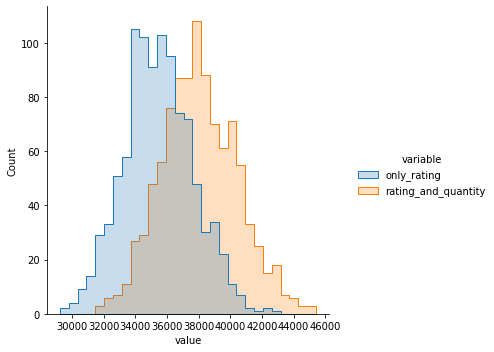

In [10]:
sns.displot(results.melt(), x="value", hue="variable", element="step")
plt.show()

Po przeanalizowaniu większej ilości prób oraz utworzeniu wykres widać że odchylenie jest dosyć duże.  
Ponownie widzimy też negatywny wpływ braku danych z innych kolumn na jakość imutowanych danych.